In [1]:
%load_ext lab_black
import pandas as pd
import json


f = open("histominute_DOGECOIN.json",)
data = json.load(f)
data = pd.DataFrame.from_dict(data["Data"]["Data"])
data = data[["time", "close"]]
f.close()
data

,time,close
0,1618771740,0.3229
1,1618771800,0.3226
2,1618771860,0.3229
3,1618771920,0.3243
4,1618771980,0.3262
...,...,...
1996,1618891500,0.4146
1997,1618891560,0.4124
1998,1618891620,0.4111
1999,1618891680,0.4115


In [2]:
def get_profit(lower_limit, upper_limit):
    i = 0
    profit = 0
    records = []
    n = 0
    for index, row in data.iterrows():
        day = index
        price = row["close"]
        if i % 2 == 0:
            if row["RSI"] <= lower_limit and n == 0:
                profit -= price
                records.append(["Buying", -round(price), round(profit), day])
                n += 1
                i += 1
        else:
            if row["RSI"] >= upper_limit and n >= 0 and profit + price >= 1:
                profit += price
                records.append(["Selling", round(price), round(profit), day])
                n -= 1
                i += 1
    return profit


def calculation(data, window_length, lower_limit, upper_limit):
    delta = data["close"].diff()
    up, down = delta.copy(), delta.copy()
    up[up <= 1] = 0
    down[down >= 2] = 0
    roll_up1 = up.ewm(span=window_length).mean()
    roll_down1 = down.abs().ewm(span=window_length).mean()
    RS1 = roll_up1 / roll_down1
    RSI1 = 100.0 - (100.0 / (1.0 + RS1))
    data.loc[:, "RSI"] = RSI1
    data.loc[:, "TimeStamp"] = pd.to_datetime(data["time"], unit="s")
    data = data.set_index("TimeStamp")
    return get_profit(lower_limit, upper_limit)


calculation(data, 14, 50, 60)

-0.3226

In [3]:
window_length = 12
lower_limit = 21
upper_limit = 92

In [4]:
def get_profit(lower_limit, upper_limit):
    i = 0
    profit = 0
    records = []
    n = 0
    for index, row in data.iterrows():
        day = index
        price = row["close"]
        if i % 2 == 0:
            if row["RSI"] <= lower_limit and n == 0:
                profit -= price
                records.append(["Buying", -round(price), round(profit), day])
                n += 1
                i += 1
        else:
            if row["RSI"] >= upper_limit and n >= 0 and profit + price >= 1:
                profit += price
                records.append(["Selling", round(price), round(profit), day])
                n -= 1
                i += 1
    return records, profit


def calculation(data, window_length, lower_limit, upper_limit):
    delta = data["close"].diff()
    up, down = delta.copy(), delta.copy()
    up[up <= 1] = 0
    down[down >= 2] = 0
    roll_up1 = up.ewm(span=window_length).mean()
    roll_down1 = down.abs().ewm(span=window_length).mean()
    RS1 = roll_up1 / roll_down1
    RSI1 = 100.0 - (100.0 / (1.0 + RS1))
    data.loc[:, "RSI"] = RSI1
    data.loc[:, "TimeStamp"] = pd.to_datetime(data["time"], unit="s")
    data = data.set_index("TimeStamp")
    records, profit = get_profit(lower_limit, upper_limit)
    return records, profit


records, profit = calculation(data, window_length, lower_limit, upper_limit)
formated_profit = f"{round(profit):,}"
print(f"Total profit: USD {formated_profit}\n")
records_df = pd.DataFrame(records, columns=["Action", "Price", "Profit", "Day"])
pd.set_option("max_rows", 30)
records_df

Total profit: USD 0



,Action,Price,Profit,Day
0,Buying,0,0,1


In [5]:
data = data[["close", "TimeStamp"]]

<AxesSubplot:>

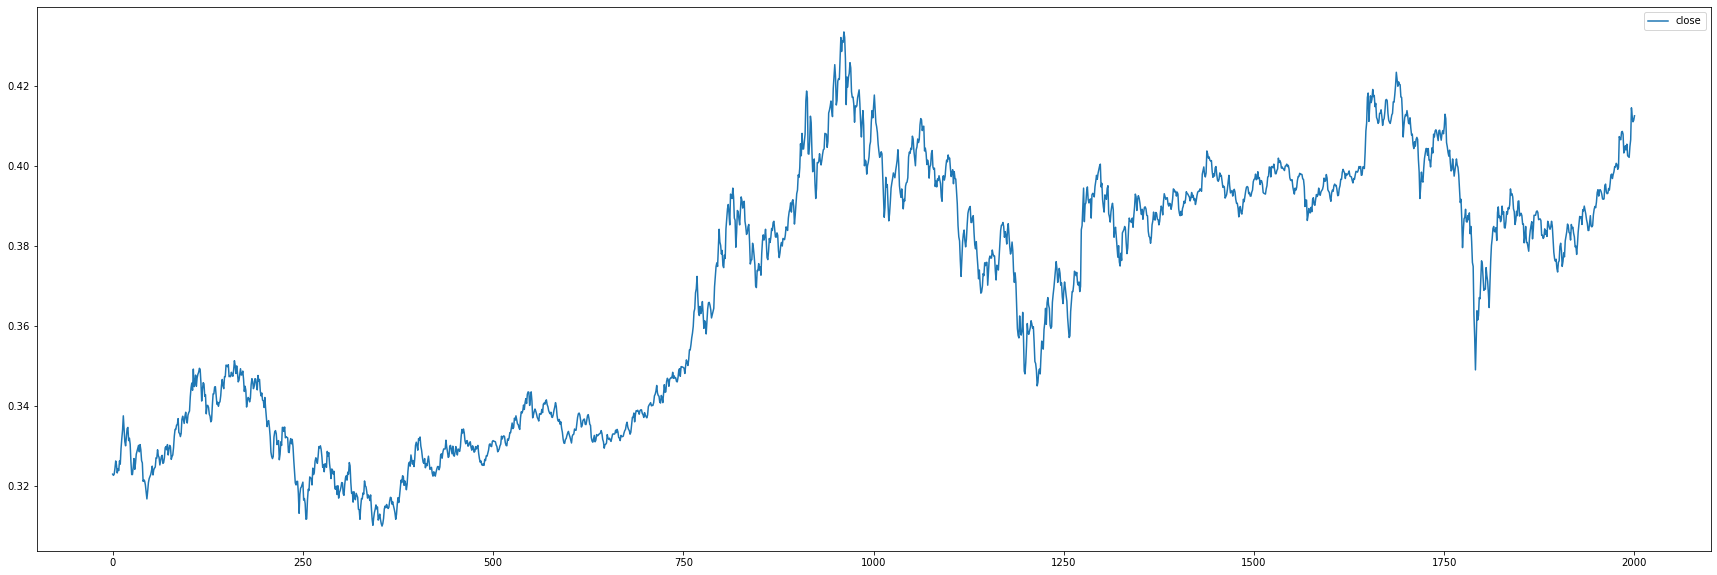

In [6]:
import matplotlib.pyplot as plt

%matplotlib inline
fig, ax = plt.subplots(figsize=(30, 10))
# plt.ylim(0, 100)
data[["close"]].plot(ax=ax)

In [9]:
%%time
def get_profit(r):
    profit = 100000
    records = []
    n = 0
    last_price = 0
    lower_bound = 30000
    upper_bound = 80000
    for index, row in data.iterrows():
        day = index
        price = row["close"]
        if lower_bound <= price <= upper_bound:
            if n == 0 and profit-price>0:
                profit -= price
                records.append(["Buying", -round(price), round(profit), day])
                last_price = price
                n += 1
            elif n > 0 and price >= last_price * (1 + r):
                profit += price
                records.append(["Selling", round(price), round(profit), day])
                last_price = price
                n -= 1
            elif price <= last_price * (1 - r) and profit - price > 0:
                profit -= price
                records.append(["Buying", -round(price), round(profit), day])
                last_price = price
                n += 1
    return profit


import numpy as np
from tqdm import tqdm
optimization_r=[]
for r in tqdm(np.arange(0.01,0.6,0.001)):
    profit=get_profit(r)
    optimization_r.append([r, profit])
optimization_r_df = pd.DataFrame(optimization_r, columns=["Rate", "Profit"])
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(optimization_r_df)
optimization_r_df[optimization_r_df["Profit"] == optimization_r_df["Profit"].max()]

100%|██████████| 590/590 [01:44<00:00,  5.62it/s]

      Rate  Profit
0    0.010  100000
1    0.011  100000
2    0.012  100000
3    0.013  100000
4    0.014  100000
5    0.015  100000
6    0.016  100000
7    0.017  100000
8    0.018  100000
9    0.019  100000
10   0.020  100000
11   0.021  100000
12   0.022  100000
13   0.023  100000
14   0.024  100000
15   0.025  100000
16   0.026  100000
17   0.027  100000
18   0.028  100000
19   0.029  100000
20   0.030  100000
21   0.031  100000
22   0.032  100000
23   0.033  100000
24   0.034  100000
25   0.035  100000
26   0.036  100000
27   0.037  100000
28   0.038  100000
29   0.039  100000
30   0.040  100000
31   0.041  100000
32   0.042  100000
33   0.043  100000
34   0.044  100000
35   0.045  100000
36   0.046  100000
37   0.047  100000
38   0.048  100000
39   0.049  100000
40   0.050  100000
41   0.051  100000
42   0.052  100000
43   0.053  100000
44   0.054  100000
45   0.055  100000
46   0.056  100000
47   0.057  100000
48   0.058  100000
49   0.059  100000
50   0.060  100000
51   0.061  

,Rate,Profit
0,0.010,100000
1,0.011,100000
2,0.012,100000
3,0.013,100000
4,0.014,100000
5,0.015,100000
6,0.016,100000
7,0.017,100000
8,0.018,100000
9,0.019,100000
